<a href="https://colab.research.google.com/github/achalweise/sales-predictions/blob/main/Sales_Prediction_Part_2_(_Cleaning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
filename = '/content/sales_predictions (1).csv'

df_sales_prediction =pd.read_csv(filename)
df_sales_prediction.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


1) How many rows and columns?



In [13]:
df_sales_prediction.shape

(8523, 12)

2) What are the datatypes of each variable?



In [14]:
df_sales_prediction.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

3) Are there duplicates? If so, drop any duplicates.


In [15]:
df_sales_prediction.duplicated().any() #no duplicates 

False

4) Identify missing values.


In [16]:
df_sales_prediction.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

In [17]:
df_sales_prediction['Item_Weight'].mean() 

12.857645184136183

In [24]:
df_sales_prediction['Item_Weight'].fillna(value = '13', inplace = True) # Filled Nan with the average 

In [22]:
df_sales_prediction['Outlet_Size'].fillna(value = 'Medium', inplace = True) # Filled Nan with Medium 

6) Confirm that there are no missing values after addressing them.

In [26]:
df_sales_prediction.isna().sum() # columns removed 


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 

In [27]:
#Item Fat Content Clean Up
df_sales_prediction['Item_Fat_Content'].value_counts()
df_sales_prediction.replace(['LF', 'Low Fat'],  inplace = True)
df_sales_prediction.replace(['reg', 'Regular'], inplace = True)
df_sales_prediction.replace(['low fat','Low Fat'], inplace = True)
df_sales_prediction['Item_Fat_Content'].value_counts()
df_sales_prediction.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Low Fat,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.5,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.2,Low Fat,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [28]:
df_sales_prediction['Item_Type'].value_counts()
df_sales_prediction['Outlet_Identifier'].value_counts()
df_sales_prediction['Outlet_Establishment_Year'].value_counts()
df_sales_prediction['Outlet_Location_Type'].value_counts()
df_sales_prediction['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

8) For any numerical columns, obtain the summary statistics of each (min, max, mean)

In [29]:
df_sales_prediction.describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,1997.831867,2181.288914
std,0.051598,62.275067,8.371760,1706.499616
min,0.000000,31.290000,1985.000000,33.290000
25%,0.026989,93.826500,1987.000000,834.247400
50%,0.053931,143.012800,1999.000000,1794.331000
75%,0.094585,185.643700,2004.000000,3101.296400
max,0.328391,266.888400,2009.000000,13086.964800


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df_sales_prediction.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Low Fat,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.5,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.2,Low Fat,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Low Fat    8523
Name: Item_Fat_Content, dtype: int64

Histogram to view the distributions of various features in your dataset.

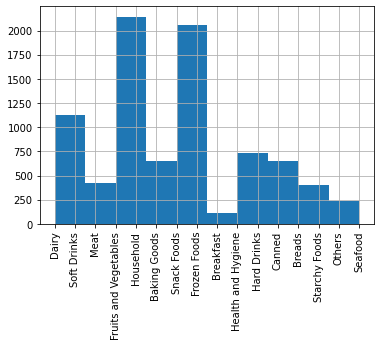

In [56]:
df_sales_prediction['Item_Type'].hist()
plt.xticks(rotation = 90); # 

In [72]:
df_sales_prediction['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

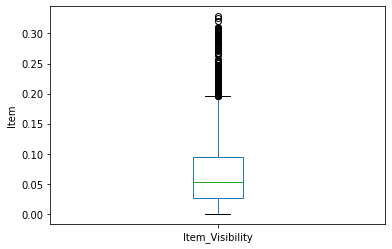

In [90]:
df_sales_prediction['Item_Visibility'].plot(kind='box')
plt.ylabel('Item')
plt.show() #Trying to create a boxplot for Item Visibility / Item Type ( Snacks and fruits and veggies )

Boxplot to view statistical summaries of various features in your dataset.

Heatmap of the correlation between features.

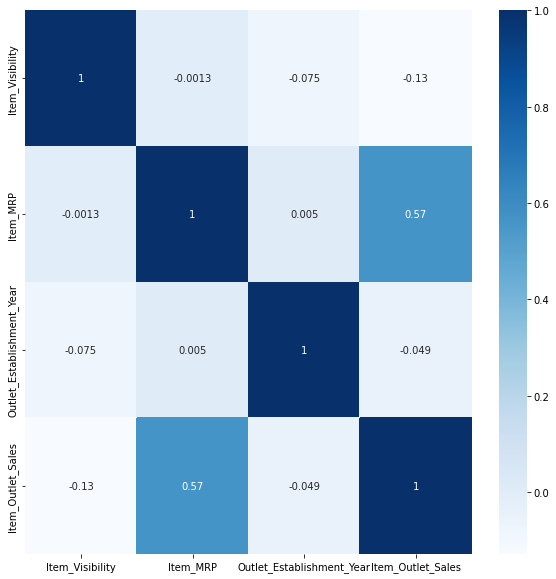

In [69]:
corr = df_sales_prediction.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,cmap= 'Blues', annot=True);